<a href="https://colab.research.google.com/github/notfawkes/SIGAI-Website/blob/main/Kisan_Mitra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data CLeaning

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some aesthetic options for our plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Load the dataset from the CSV file
# Assuming 'APY.csv' is in the same folder as your notebook to get the files visit the main folder: https://drive.google.com/drive/folders/1gPLcSg2tKTEAa9YmKH08dGGY_FSZE81Y?usp=sharing
try:
    df = pd.read_csv('APY.csv')
    print("Dataset 'APY.csv' loaded successfully!")
    print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print("Error: 'APY.csv' not found. Please make sure the file is in the correct directory.")

# Display the first 5 rows to get an initial feel for the data
if 'df' in locals():
    display(df.head())

Dataset 'APY.csv' loaded successfully!
The dataset has 345336 rows and 8 columns.


,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [ ]:
# Check the number of missing values in each column
print("\n--- Missing Values Count ---")
print(df.isnull().sum())


--- Missing Values Count ---
State            0
District         0
Crop             9
Crop_Year        0
Season           0
Area             0
Production    4948
Yield            0
dtype: int64


In [ ]:
display(df.describe())

,Crop_Year,Area,Production,Yield
count,345336.000000,3.453360e+05,3.403880e+05,345336.000000
mean,2008.887512,1.167147e+04,9.584726e+05,79.423135
std,6.564361,4.584079e+04,2.153068e+07,916.678396
min,1997.000000,4.000000e-03,0.000000e+00,0.000000
25%,2003.000000,7.400000e+01,8.700000e+01,0.550000
50%,2009.000000,5.320000e+02,7.170000e+02,1.000000
75%,2015.000000,4.112000e+03,7.182000e+03,2.470000
max,2020.000000,8.580100e+06,1.597800e+09,43958.330000


In [ ]:
# Let's see the number of rows before cleaning
print(f"Rows before cleaning: {len(df)}")

# Drop rows where 'Production and Crop' is missing (NaN)
df.dropna(subset=['Production'], inplace=True)
df.dropna(subset=['Crop'], inplace=True)

print(f"Rows after dropping NaNs in 'Production' and 'Crop': {len(df)}")

# Drop rows where 'Area' or 'Production' is zero, as yield cannot be calculated
# A production of 0 could mean crop failure, but for yield prediction, it's often noise.
df = df[df['Area'] > 0]

print(f"Rows after removing entries with Area = 0: {len(df)}")

Rows before cleaning: 345336
Rows after dropping NaNs in 'Production' and 'Crop': 340383
Rows after removing entries with Area = 0: 340383


In [ ]:
# --- Universal Whitespace Cleaner for the Entire DataFrame ---

print("--- Before Cleaning ---")
# Let's check the unique values in 'Season' to see the whitespace issue
if 'Season' in df.columns:
    print("Unique 'Season' values before cleaning:")
    print(df['Season'].unique())
else:
    # If Season isn't a column, we might have already cleaned the headers. Let's check for a dirty one.
    dirty_col_name = next((col for col in df.columns if ' ' in col), None)
    if dirty_col_name:
        print(f"Checking a sample column with whitespace in its name: '{dirty_col_name}'")


# Step 1: Clean column headers (removes leading/trailing spaces)
df.columns = df.columns.str.strip()
print("\nColumn headers have been stripped of whitespace.")


# Step 2: Clean whitespace in all object/string columns
# We select only the columns with text data to apply the string operation
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].apply(lambda x: x.str.strip())
print("All text-based rows have been stripped of whitespace.")


print("\n--- After Cleaning ---")
print("Unique 'Season' values after cleaning:")
print(df['Season'].unique())

print("\nCleaning complete! Your DataFrame is now much more reliable.")

--- Before Cleaning ---
Unique 'Season' values before cleaning:
['Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     ' 'Whole Year '
 'Winter     ']

Column headers have been stripped of whitespace.
All text-based rows have been stripped of whitespace.

--- After Cleaning ---
Unique 'Season' values after cleaning:
['Kharif' 'Rabi' 'Autumn' 'Summer' 'Whole Year' 'Winter']

Cleaning complete! Your DataFrame is now much more reliable.


In [ ]:
df.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [ ]:
unique_crops_array = df['Crop'].unique()

# Convert the array to a Python list
unique_crops_list = unique_crops_array.tolist()

# Print the list
print(unique_crops_list)

['Arecanut', 'Arhar/Tur', 'Banana', 'Black pepper', 'Cashewnut', 'Coconut', 'Cowpea(Lobia)', 'Dry chillies', 'Ginger', 'Groundnut', 'Maize', 'Moong(Green Gram)', 'Oilseeds total', 'Other Kharif pulses', 'other oilseeds', 'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Sugarcane', 'Sunflower', 'Sweet potato', 'Tapioca', 'Turmeric', 'Urad', 'Bajra', 'Castor seed', 'Coriander', 'Cotton(lint)', 'Garlic', 'Gram', 'Guar seed', 'Horse-gram', 'Jowar', 'Linseed', 'Masoor', 'Mesta', 'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato', 'Ragi', 'Safflower', 'Small millets', 'Soyabean', 'Tobacco', 'Wheat', 'Peas & beans (Pulses)', 'Jute', 'Barley', 'Khesari', 'Sannhamp', 'Moth', 'Other Cereals', 'Cardamom', 'Other Summer Pulses']


Filtering Oilseed Crops


In [ ]:
# --- Define the list of oilseed crops ---
oilseed_crops_list = [
    'Coconut', 'Groundnut', 'Oilseeds total', 'other oilseeds',
    'Rapeseed &Mustard', 'Sesamum', 'Sunflower', 'Castor seed',
    'Linseed', 'Niger seed', 'Safflower', 'Soyabean'
]

print(f"Original DataFrame length: {len(df)}")
print(f"Filtering using {len(oilseed_crops_list)} identified oilseed crops...")

# --- Filter the DataFrame in place ---
# Create a boolean mask for rows that are oilseeds
is_oilseed = df['Crop'].isin(oilseed_crops_list)

# Overwrite df with only the rows where the mask is True
df = df[is_oilseed]

print(f"DataFrame length after filtering for oilseeds: {len(df)}")

# --- Display the first few rows of the modified DataFrame (optional) ---
print("\nFirst 5 rows of the modified DataFrame (df):")
print(df.head())

# Now the original 'df' contains only oilseed data

Original DataFrame length: 340383
Filtering using 12 identified oilseed crops...
DataFrame length after filtering for oilseeds: 67601

First 5 rows of the modified DataFrame (df):
                          State  District     Crop  Crop_Year      Season  \
207  Andaman and Nicobar Island  NICOBARS  Coconut       2007  Whole Year   
208  Andaman and Nicobar Island  NICOBARS  Coconut       2008  Whole Year   
209  Andaman and Nicobar Island  NICOBARS  Coconut       2009  Whole Year   
210  Andaman and Nicobar Island  NICOBARS  Coconut       2000  Whole Year   
211  Andaman and Nicobar Island  NICOBARS  Coconut       2001  Whole Year   

        Area  Production    Yield  
207  21636.0  80640000.0  3727.12  
208  43380.0  81900000.0  1887.97  
209  43520.0  84970000.0  1952.44  
210  18168.0  65100000.0  3583.22  
211  18190.0  64430000.0  3542.06  


Outliers pose a Significant issue

In [ ]:
# Sort the DataFrame to see the rows with the highest yield
top_yield_outliers = df.sort_values(by='Yield', ascending=False)

print("Top 5 rows with the highest (and most suspicious) yield:")
display(top_yield_outliers.head())

Top 5 rows with the highest (and most suspicious) yield:


,State,District,Crop,Crop_Year,Season,Area,Production,Yield
24551,Assam,TINSUKIA,Coconut,2018,Whole Year,72.0,3165000.0,43958.33
333525,West Bengal,BIRBHUM,Coconut,2006,Whole Year,509.0,19749200.0,38800.00
258896,Tamil Nadu,ERODE,Coconut,2008,Whole Year,10014.0,331800000.0,33133.61
24552,Assam,TINSUKIA,Coconut,2019,Whole Year,71.0,2340000.0,32957.75
3122,Andhra Pradesh,PRAKASAM,Coconut,2018,Whole Year,19.0,600000.0,31578.95


In [ ]:
print("Calculating yield statistics per crop...")

# Calculate average and maximum yield for each unique crop name
crop_yield_stats = df.groupby('Crop')['Yield'].agg(['mean', 'max']).reset_index()

# Sort by maximum yield to see the most extreme values
top_max_yield_crops = crop_yield_stats.sort_values(by='max', ascending=False)

# Sort by average yield as well
top_avg_yield_crops = crop_yield_stats.sort_values(by='mean', ascending=False)

print("\n--- Crops with Highest Maximum Calculated Yield ---")
print("(These are strong candidates for being unit-based, e.g., nuts/hectare)")
# Display the top 15 crops with the highest single yield entry
print(top_max_yield_crops.head(15).to_string())

print("\n--- Crops with Highest Average Calculated Yield ---")
print("(High averages also suggest unit-based measurement)")
# Display the top 15 crops with the highest average yield
print(top_avg_yield_crops.head(15).to_string())

print("\n--- Interpretation ---")
print("Look at the 'max' and 'mean' columns. Crops with yields significantly")
print("higher than what's typical for tonnes/hectare (e.g., >> 20-30) are")
print("very likely measured in units like nuts, bunches, or pieces.")
print("Based on common knowledge and typical outlier values in these datasets,")
print("'Coconut', 'Banana', 'Arecanut', 'Cashewnut', 'Black pepper', and 'Cardamom'")
print("are often reported in units.")

Calculating yield statistics per crop...

--- Crops with Highest Maximum Calculated Yield ---
(These are strong candidates for being unit-based, e.g., nuts/hectare)
                 Crop         mean       max
1             Coconut  8943.243196  43958.33
8             Sesamum     0.509976    275.00
4          Niger seed     0.404557     71.00
10          Sunflower     0.966047     70.00
2           Groundnut     1.318744     49.00
11     other oilseeds     1.573605     32.57
5      Oilseeds total     1.871310     24.73
9            Soyabean     1.066794     11.44
6   Rapeseed &Mustard     0.833054      8.54
0         Castor seed     0.758023      7.50
3             Linseed     0.554055      7.00
7           Safflower     0.553812      4.17

--- Crops with Highest Average Calculated Yield ---
(High averages also suggest unit-based measurement)
                 Crop         mean       max
1             Coconut  8943.243196  43958.33
5      Oilseeds total     1.871310     24.73
11     oth

Coconut is counted as units/hectre so converting them to tonnes per hectre

In [ ]:
# --- Define the assumption ---
avg_coconut_weight_tonnes = 0.001 # ASSUMPTION: 1 kg (0.001 tonnes) per nut
print(f"Using assumed average weight: {avg_coconut_weight_tonnes} tonnes per coconut.")

# --- Identify Coconut rows ---
coconut_mask = df['Crop'] == 'Coconut'
coconut_rows_count = coconut_mask.sum()
print(f"Found {coconut_rows_count} rows for Coconut to convert.")

if coconut_rows_count > 0:
    # --- Apply conversion to 'Production' ---
    # Use .loc to modify the DataFrame slice directly
    df.loc[coconut_mask, 'Production'] = df.loc[coconut_mask, 'Production'] * avg_coconut_weight_tonnes
    print("Converted 'Production' for Coconut rows to tonnes.")

    # --- Recalculate 'Yield' for Coconut ---
    # Ensure Area is not zero before dividing to avoid errors/infinity
    non_zero_area_mask = coconut_mask & (df['Area'] > 0)
    zero_area_mask = coconut_mask & (df['Area'] <= 0)

    df.loc[non_zero_area_mask, 'Yield'] = df.loc[non_zero_area_mask, 'Production'] / df.loc[non_zero_area_mask, 'Area']
    df.loc[zero_area_mask, 'Yield'] = 0 # Assign 0 yield if Area is 0

    print("Recalculated 'Yield' for Coconut rows.")

    # --- Display some converted Coconut rows (optional) ---
    print("\nExample rows for Coconut after conversion:")
    print(df[coconut_mask].head())
else:
    print("No 'Coconut' rows found in the current DataFrame to convert.")

# The DataFrame 'df' now has Coconut production in tonnes and recalculated yield

Using assumed average weight: 0.001 tonnes per coconut.
Found 2891 rows for Coconut to convert.
Converted 'Production' for Coconut rows to tonnes.
Recalculated 'Yield' for Coconut rows.

Example rows for Coconut after conversion:
                          State  District     Crop  Crop_Year      Season  \
207  Andaman and Nicobar Island  NICOBARS  Coconut       2007  Whole Year   
208  Andaman and Nicobar Island  NICOBARS  Coconut       2008  Whole Year   
209  Andaman and Nicobar Island  NICOBARS  Coconut       2009  Whole Year   
210  Andaman and Nicobar Island  NICOBARS  Coconut       2000  Whole Year   
211  Andaman and Nicobar Island  NICOBARS  Coconut       2001  Whole Year   

        Area  Production     Yield  
207  21636.0     80640.0  3.727121  
208  43380.0     81900.0  1.887967  
209  43520.0     84970.0  1.952436  
210  18168.0     65100.0  3.583223  
211  18190.0     64430.0  3.542056  


In [ ]:
# Set the cap using the 99th percentile
yield_cap = df['Yield'].quantile(0.99)

print(f"Using a cap of: {yield_cap:.2f}")

# Apply the cap to the 'Yield' column
df.loc[df['Yield'] > yield_cap, 'Yield'] = yield_cap

print("\n--- Descriptive statistics AFTER capping at the 99th percentile ---")
display(df.describe())

Using a cap of: 12.70

--- Descriptive statistics AFTER capping at the 99th percentile ---


,Crop_Year,Area,Production,Yield
count,67601.000000,6.760100e+04,6.760100e+04,67601.000000
mean,2008.604518,9.972623e+03,1.436582e+04,1.152582
std,6.622952,6.745582e+04,7.894720e+04,1.821038
min,1997.000000,6.000000e-02,0.000000e+00,0.000000
25%,2003.000000,8.200000e+01,4.700000e+01,0.400000
50%,2009.000000,5.500000e+02,3.300000e+02,0.710000
75%,2015.000000,3.295000e+03,2.784000e+03,1.150000
max,2020.000000,8.580100e+06,7.556300e+06,12.697239


In [ ]:
# Sort the DataFrame to see the rows with the highest yield
top_yield_outliers = df.sort_values(by='Yield', ascending=False)

print("Top 5 rows with the highest (and most suspicious) yield:")
display(top_yield_outliers.head())

Top 5 rows with the highest (and most suspicious) yield:


,State,District,Crop,Crop_Year,Season,Area,Production,Yield
228918,Puducherry,KARAIKAL,Coconut,2000,Whole Year,223.0,4014.0,12.697239
228917,Puducherry,KARAIKAL,Coconut,1999,Whole Year,222.0,3663.0,12.697239
259110,Tamil Nadu,THANJAVUR,Coconut,2015,Whole Year,37210.0,849300.0,12.697239
24028,Assam,BARPETA,Coconut,2011,Whole Year,1941.0,31488.0,12.697239
259132,Tamil Nadu,THENI,Coconut,2004,Whole Year,14903.0,231500.0,12.697239


EDA

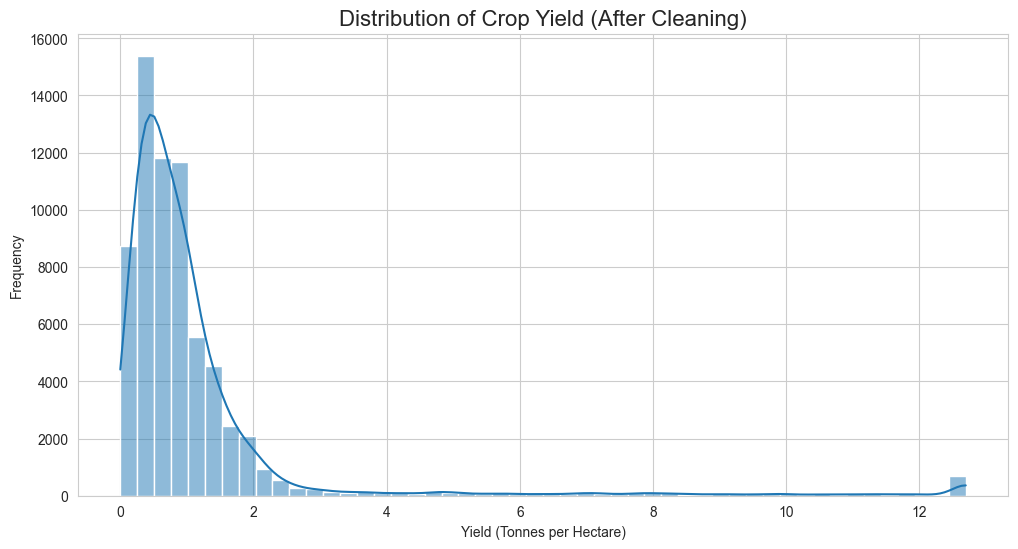

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Yield'], bins=50, kde=True)
plt.title('Distribution of Crop Yield (After Cleaning)', fontsize=16)
plt.xlabel('Yield (Tonnes per Hectare)')
plt.ylabel('Frequency')
plt.show()

C:\Users\manna\AppData\Local\Temp\ipykernel_15324\3038130775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='viridis')


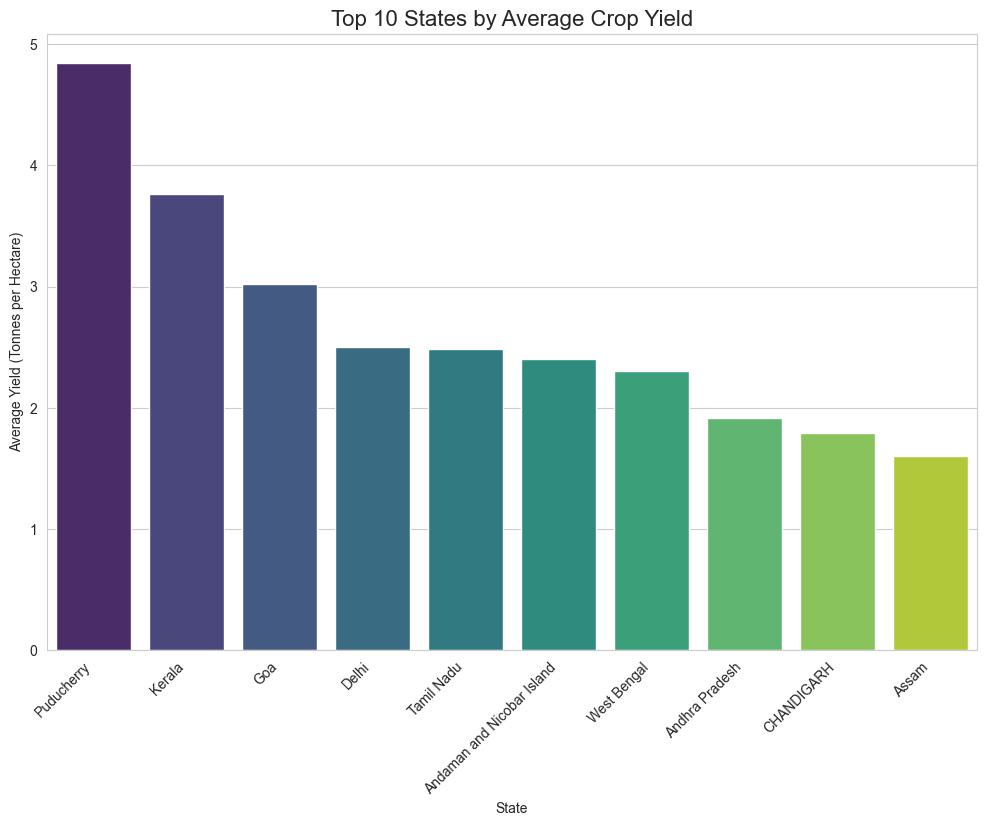

In [ ]:
# Calculate the average yield for each state and get the top 10
top_10_states = df.groupby('State')['Yield'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='viridis')
plt.title('Top 10 States by Average Crop Yield', fontsize=16)
plt.xlabel('State')
plt.ylabel('Average Yield (Tonnes per Hectare)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.show()

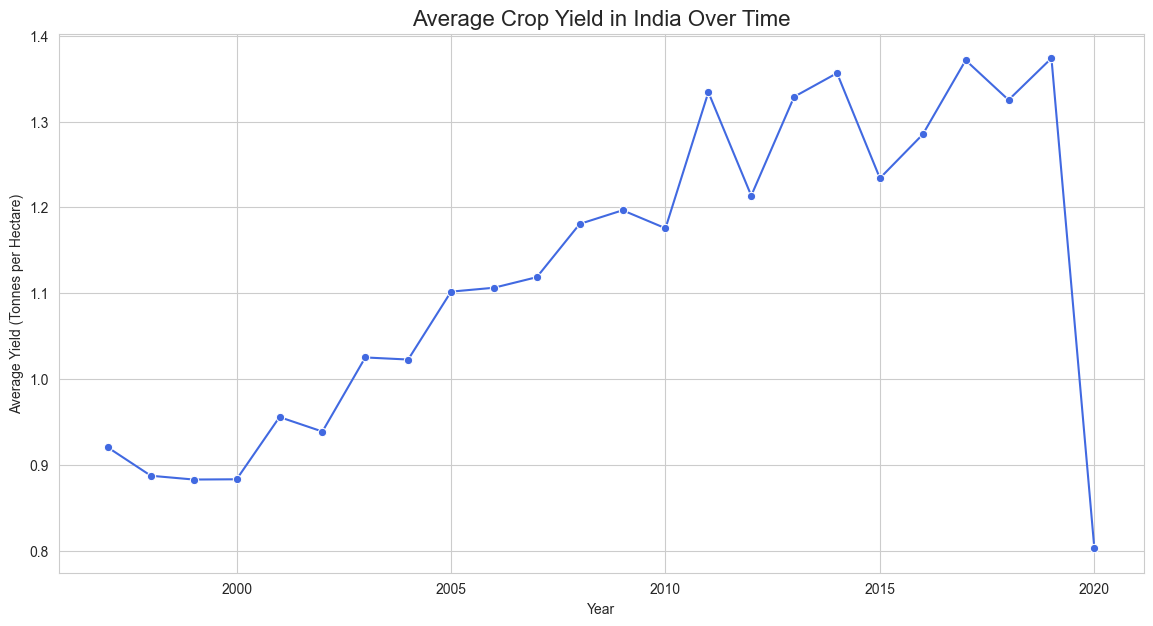

In [ ]:
# Calculate the average yield for each year
yearly_yield = df.groupby('Crop_Year')['Yield'].mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x=yearly_yield.index, y=yearly_yield.values, marker='o', color='royalblue')
plt.title('Average Crop Yield in India Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Yield (Tonnes per Hectare)')
plt.grid(True)
plt.show()

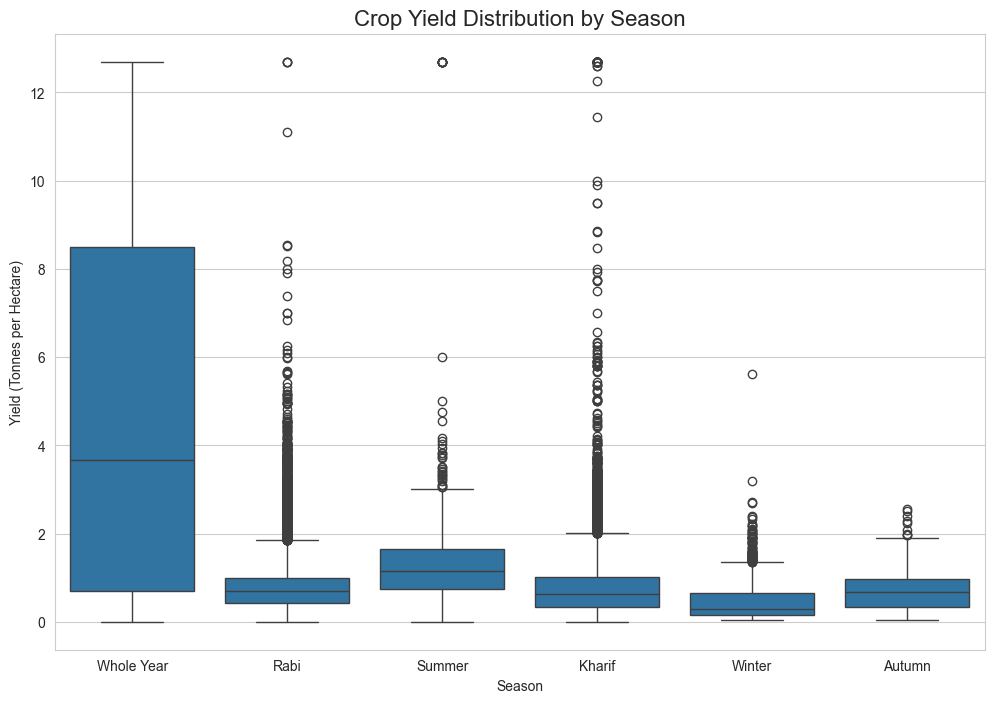

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Season', y='Yield', data=df)
plt.title('Crop Yield Distribution by Season', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Yield (Tonnes per Hectare)')
plt.show()

In [ ]:
df['Season'].value_counts()

Season
Kharif        31748
Rabi          23735
Whole Year     5334
Summer         4493
Winter         1412
Autumn          879
Name: count, dtype: int64

In [ ]:
df['Crop'].value_counts()

Crop
Sesamum              12744
Groundnut            12515
Rapeseed &Mustard    10919
Sunflower             7104
Linseed               5793
Soyabean              4953
Castor seed           4496
Coconut               2891
Niger seed            2835
Safflower             1726
other oilseeds        1190
Oilseeds total         435
Name: count, dtype: int64

2020 code looks like an issue due to covid 19 or incomplete crop yield data

In [ ]:
# Print number of rows before removing 2020
print(f"Rows before removing 2020 data: {len(df)}")

# Filter out the anomalous 2020 data
df = df[df['Crop_Year'] != 2020]

print(f"Rows after removing 2020 data: {len(df)}")

Rows before removing 2020 data: 67601
Rows after removing 2020 data: 67547


In [ ]:
# Save the DataFrame to a new CSV file, without the index column
# df.to_csv('data.csv', index=False)

# print("DataFrame successfully saved to 'data.csv'!")

In [ ]:
display(df.describe())

,Crop_Year,Area,Production,Yield
count,67547.000000,6.754700e+04,6.754700e+04,67547.000000
mean,2008.595408,9.980254e+03,1.437698e+04,1.152861
std,6.617753,6.748223e+04,7.897776e+04,1.821695
min,1997.000000,6.000000e-02,0.000000e+00,0.000000
25%,2003.000000,8.200000e+01,4.700000e+01,0.400000
50%,2009.000000,5.508300e+02,3.300000e+02,0.710000
75%,2014.000000,3.299000e+03,2.788000e+03,1.150000
max,2019.000000,8.580100e+06,7.556300e+06,12.697239


#### Data is ready to be fed to the RF model


In [ ]:
import mapie.regression
print(dir(mapie.regression))

['ConformalizedQuantileRegressor', 'CrossConformalRegressor', 'JackknifeAfterBootstrapRegressor', 'SplitConformalRegressor', 'TimeSeriesRegressor', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'quantile_regression', 'regression', 'time_series_regression']


In [ ]:
# Import the necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# CHANGE 1: Import the new, specific class
from mapie.regression import ConformalizedQuantileRegressor

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67547 entries, 207 to 343945
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       67547 non-null  object 
 1   District    67547 non-null  object 
 2   Crop        67547 non-null  object 
 3   Crop_Year   67547 non-null  int64  
 4   Season      67547 non-null  object 
 5   Area        67547 non-null  float64
 6   Production  67547 non-null  float64
 7   Yield       67547 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.6+ MB


In [ ]:
# -- Step 1: Split the Data --

# 1. Select the features and target from your cleaned DataFrame 'df'
FEATURES = ['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area']
TARGET = 'Yield'

X_orig = df[FEATURES]
y = df[TARGET]

# 2. One-hot encode the categorical features to create the final 'X' matrix
X = pd.get_dummies(X_orig, columns=['State', 'District', 'Crop', 'Season'], drop_first=True)

print("Feature matrix 'X' and target 'y' are ready.")

# 3. Now, split the data (this will work because 'X' and 'y' are now defined)
# First, split into a main training set (80%) and a final test set (20%)
X_train_main, X_test, y_train_main, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Next, split the main training set into a proper training set (75%)
# and a calibration set (25%) for MAPIE
X_train, X_cal, y_train, y_cal = train_test_split(
    X_train_main, y_train_main, test_size=0.25, random_state=42
)

print(f"Data split into: {len(X_train)} training, {len(X_cal)} calibration, and {len(X_test)} test samples.")

Feature matrix 'X' and target 'y' are ready.
Data split into: 40527 training, 13510 calibration, and 13510 test samples.


In [ ]:
# Import the required model
from sklearn.ensemble import HistGradientBoostingRegressor

# --- Block 2: Model Instantiation ---

# Create the base model configured for quantile regression [cite: 218]
base_model = HistGradientBoostingRegressor(loss='quantile')

# CORRECT: Instantiate the wrapper and set the confidence level at creation [cite: 219]
mapie_regressor = ConformalizedQuantileRegressor(
    estimator=base_model,
    confidence_level=0.9  # 90% confidence level [cite: 222]
)

print("Model instantiated successfully with a 90% confidence level!")

Model instantiated successfully with a 90% confidence level!


In [ ]:
# --- Block 3: Model Training & Calibration ---

print("\nTraining the base model...")
# 1. Fit the base model on the training data [cite: 228]
mapie_regressor.fit(X_train, y_train)
print("Base model training complete!")

print("\nCalibrating the model...")
# 2. Calibrate (conformalize) using the calibration data [cite: 230]
mapie_regressor.conformalize(X_cal, y_cal)
print("Model calibration complete!")


Training the base model...
Base model training complete!

Calibrating the model...
Model calibration complete!


In [ ]:
# --- Block 4: Prediction ---

# CORRECT: Predict on the test set without a confidence_level argument [cite: 232]
y_pred, y_pis = mapie_regressor.predict_interval(X_test)
print("\nPredictions and confidence intervals have been generated!")

INFO:root:The predictions are ill-sorted.
INFO:root:The predictions are ill-sorted.



Predictions and confidence intervals have been generated!


In [ ]:
# -- Display an example output --
print("\n--- Example Prediction ---")
# The .item() method or float() is used to extract the single number from the numpy array
print(f"Predicted Yield: {y_pred[0].item():.2f} Tonnes/Hectare")
print(f"90% Confident Range: [{y_pis[0, 0].item():.2f}, {y_pis[0, 1].item():.2f}] Tonnes/Hectare")


--- Example Prediction ---
Predicted Yield: 0.83 Tonnes/Hectare
90% Confident Range: [0.41, 1.67] Tonnes/Hectare


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): On average, our prediction is off by {mae:.2f} Tonnes/Hectare.")

Mean Absolute Error (MAE): On average, our prediction is off by 0.31 Tonnes/Hectare.


In [ ]:
from mapie.metrics.regression import regression_coverage_score, regression_mean_width_score

# The calculation remains the same
coverage = regression_coverage_score(y_test, y_pis)
width = regression_mean_width_score(y_pis)

# CORRECTED: Use .item() to extract the number from the array before formatting
print(f"\nOur Target Coverage was 90%.")
print(f"Actual Coverage on the Test Set: {coverage.item() * 100:.2f}%")
print(f"Average Width of the Confidence Range: {width.item():.2f} Tonnes/Hectare")


Our Target Coverage was 90%.
Actual Coverage on the Test Set: 89.84%
Average Width of the Confidence Range: 1.33 Tonnes/Hectare


In [ ]:
from sklearn.metrics import r2_score

# Calculate the R-squared score using the true values and predicted values
r2 = r2_score(y_test, y_pred)

print(f"R-Squared (R²) Score: {r2:.4f}")

R-Squared (R²) Score: 0.8161


In [ ]:

# Find the original features for all items in the test set
test_set_features = X_orig.loc[X_test.index]

# Filter for the most recent full year of data (2019)
recent_data_mask = test_set_features['Crop_Year'] == 2019

# Get the first 6 examples from 2019
sample_df = test_set_features[recent_data_mask].iloc[6:12]

# Get the integer positions of these samples in the test set arrays
sample_positions = X_test.index.get_indexer(sample_df.index)

# Gather all the data for these 6 samples
sample_df['Actual Yield'] = y_test.loc[sample_df.index]
sample_df['Predicted Yield'] = y_pred[sample_positions]
sample_df['Lower Bound'] = y_pis[sample_positions, 0]
sample_df['Upper Bound'] = y_pis[sample_positions, 1]

print("Data for 6 sample predictions from 2019:")
display(sample_df[['Crop', 'District', 'Actual Yield', 'Predicted Yield', 'Lower Bound', 'Upper Bound']])

Data for 6 sample predictions from 2019:


,Crop,District,Actual Yield,Predicted Yield,Lower Bound,Upper Bound
183328,Groundnut,RAIGAD,3.30,1.374151,0.535139,2.437253
27447,Linseed,HAILAKANDI,0.60,0.578812,0.300887,0.861569
342528,Sesamum,COOCHBEHAR,0.63,0.707243,0.288456,1.086679
248974,Rapeseed &Mustard,NAGAUR,1.16,1.310539,0.557841,1.971861
192733,Sesamum,YAVATMAL,0.20,0.320328,0.177511,0.972629
314229,Sesamum,BAREILLY,0.07,0.198971,0.065883,0.641276


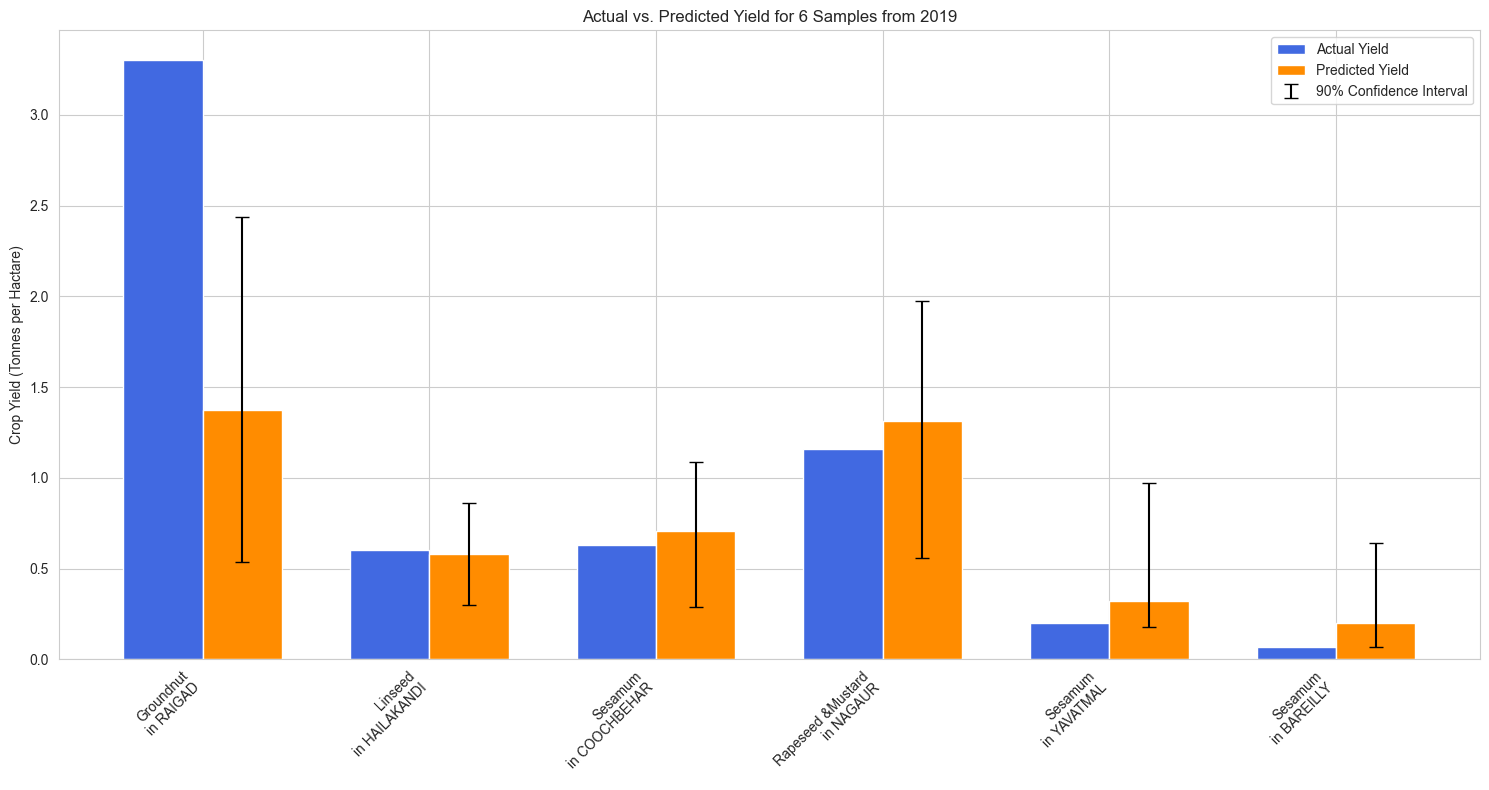

In [ ]:
# CORRECT: Use the Seaborn function to set the plot style
sns.set_style('whitegrid')

# Create unique labels for the x-axis
labels = [f"{row.Crop}\nin {row.District}" for index, row in sample_df.iterrows()]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# --- Plotting ---
fig, ax = plt.subplots(figsize=(15, 8))

# Bar for Actual Yield
rects1 = ax.bar(x - width/2, sample_df['Actual Yield'], width, label='Actual Yield', color='royalblue')

# Bar for Predicted Yield
rects2 = ax.bar(x + width/2, sample_df['Predicted Yield'], width, label='Predicted Yield', color='darkorange')

# Add the 90% confidence interval as an error bar
error = [
    sample_df['Predicted Yield'] - sample_df['Lower Bound'],
    sample_df['Upper Bound'] - sample_df['Predicted Yield']
]
ax.errorbar(x + width/2, sample_df['Predicted Yield'], yerr=error, fmt='none', ecolor='black', capsize=5, label='90% Confidence Interval')

# --- Formatting ---
ax.set_ylabel('Crop Yield (Tonnes per Hactare)')
ax.set_title('Actual vs. Predicted Yield for 6 Samples from 2019')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

fig.tight_layout()
plt.show()



In [ ]:


# --- 1. Find the prediction with the narrowest interval ---

# Calculate the width of all prediction intervals
interval_widths = y_pis[:, 1] - y_pis[:, 0]

# Find the integer position of the narrowest interval
best_pos = np.argmin(interval_widths)

# --- Extract and display the data for this result ---
actual_yield = y_test.iloc[best_pos].item()
predicted_yield = y_pred[best_pos].item()
lower_bound = y_pis[best_pos, 0].item()
upper_bound = y_pis[best_pos, 1].item()
width = interval_widths[best_pos].item()
original_features = X_orig.loc[X_test.index[best_pos]]

print("--- Best Result (Most Confident Prediction) ---")
print("\nContext:")
print(original_features.to_string())
print("\nPrediction Details:")
print(f"Actual Yield: {actual_yield:.2f} Tonnes/Hectare")
print(
    f"Predicted Yield: {predicted_yield:.2f} | "
    f"90% Confident Range: [{lower_bound:.2f}, {upper_bound:.2f}] | "
    f"Width: {width:.2f}"
)

--- Best Result (Most Confident Prediction) ---

Context:
State                Assam
District     KARBI ANGLONG
Crop            Niger seed
Crop_Year             1999
Season              Kharif
Area                  40.0

Prediction Details:
Actual Yield: 0.35 Tonnes/Hectare
Predicted Yield: 0.47 | 90% Confident Range: [0.34, 0.55] | Width: 0.21


In [ ]:
# --- 2. Find the prediction with the smallest error ---

# Calculate the absolute error between predicted and actual values
prediction_errors = np.abs(y_pred - y_test.values)

# Find the integer position of the smallest error
best_pos = np.argmin(prediction_errors)

# --- Extract and display the data for this result ---
actual_yield = y_test.iloc[best_pos].item()
predicted_yield = y_pred[best_pos].item()
lower_bound = y_pis[best_pos, 0].item()
upper_bound = y_pis[best_pos, 1].item()
width = (y_pis[best_pos, 1] - y_pis[best_pos, 0]).item()
original_features = X_orig.loc[X_test.index[best_pos]]

print("\n\n--- Best Result (Most Accurate Prediction) ---")
print("\nContext:")
print(original_features.to_string())
print("\nPrediction Details:")
print(f"Actual Yield: {actual_yield:.2f} Tonnes/Hectare")
print(
    f"Predicted Yield: {predicted_yield:.2f} | "
    f"90% Confident Range: [{lower_bound:.2f}, {upper_bound:.2f}] | "
    f"Width: {width:.2f}"
)



--- Best Result (Most Accurate Prediction) ---

Context:
State              Assam
District       KOKRAJHAR
Crop         Castor seed
Crop_Year           2015
Season            Kharif
Area                82.0

Prediction Details:
Actual Yield: 0.57 Tonnes/Hectare
Predicted Yield: 0.57 | 90% Confident Range: [0.35, 1.34] | Width: 0.99


In [ ]:

# --- 3. Find the best overall prediction (narrow and accurate) ---

# CORRECTED: Use .flatten() to ensure the data is 1-dimensional for the pandas Series
width_ranks = pd.Series((y_pis[:, 1] - y_pis[:, 0]).flatten()).rank()
error_ranks = pd.Series(np.abs(y_pred - y_test.values)).rank()
combined_score = width_ranks + error_ranks

# Find the integer position of the best (lowest) combined score
best_pos = np.argmin(combined_score)

# --- Extract and display the data for this result ---
actual_yield = y_test.iloc[best_pos].item()
predicted_yield = y_pred[best_pos].item()
lower_bound = y_pis[best_pos, 0].item()
upper_bound = y_pis[best_pos, 1].item()
width = (y_pis[best_pos, 1] - y_pis[best_pos, 0]).item()
original_features = X_orig.loc[X_test.index[best_pos]]

print("\n\n--- Best Overall Result (Confident AND Accurate) ---")
print("\nContext:")
print(original_features.to_string())
print("\nPrediction Details:")
print(f"Actual Yield: {actual_yield:.2f} Tonnes/Hectare")
print(
    f"Predicted Yield: {predicted_yield:.2f} | "
    f"90% Confident Range: [{lower_bound:.2f}, {upper_bound:.2f}] | "
    f"Width: {width:.2f}"
)



--- Best Overall Result (Confident AND Accurate) ---

Context:
State          Bihar
District     KATIHAR
Crop         Linseed
Crop_Year       2014
Season          Rabi
Area           482.0

Prediction Details:
Actual Yield: 0.86 Tonnes/Hectare
Predicted Yield: 0.86 | 90% Confident Range: [0.74, 0.97] | Width: 0.23
